### Import Data

In [1]:
import pandas as pd
loan_data = pd.read_csv('loan-train.csv')
loan_data.head()
loan_data.iloc[:,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
loan_data.shape

(614, 13)

### Exploratory Data Analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

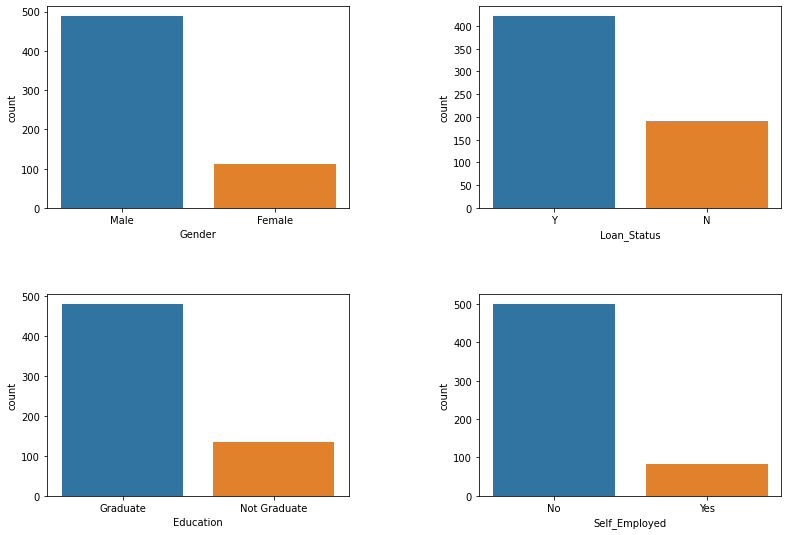

In [4]:
fig = plt.figure()

axes1 = fig.add_axes([0, 1, 0.7, .7])
sns.countplot(x='Gender', data=loan_data)
axes1.plot()

axes2 = fig.add_axes([1, 1, .7, .7])
sns.countplot(x='Loan_Status', data=loan_data)
axes2.plot()

axes3 = fig.add_axes([0, 0, .7, .7])
sns.countplot(x='Education', data=loan_data)
axes2.plot()

axes2 = fig.add_axes([1, 0, .7, .7])
sns.countplot(x='Self_Employed', data=loan_data)
axes2.plot()

plt.plot()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

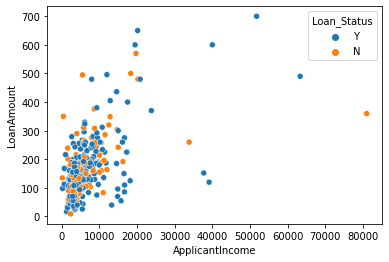

In [5]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan_data, hue='Loan_Status')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

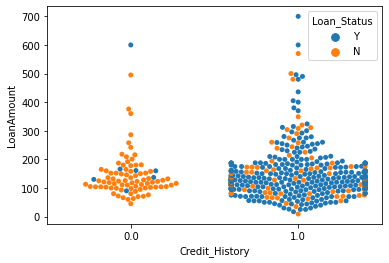

In [6]:
sns.swarmplot(x='Credit_History', y='LoanAmount', data=loan_data, hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

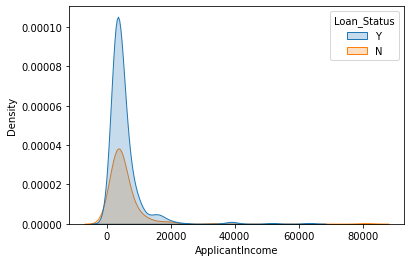

In [7]:
sns.kdeplot(x='ApplicantIncome', data=loan_data, hue='Loan_Status', shade=True)

### Feature Engineering

#### Drop Loan_ID column

In [8]:
loan_data.drop('Loan_ID', axis=1, inplace=True)

#### Drop Nan Values

In [9]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_data.dropna(inplace=True)

#### Convert Categorical Variables to Numerical Variables

In [11]:
cat_cols = [col for col in loan_data.columns if loan_data[col].dtype == 'O']
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    loan_data[col] = le.fit_transform(loan_data[col])
    
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


### Split Data into Training and Validation Set

In [13]:
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

In [14]:
from sklearn.model_selection import train_test_split

seed=0
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed)

print("Training Data:", X_train.shape)
print("Validation Data:", X_val.shape)

Training Data: (360, 11)
Validation Data: (120, 11)


### Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB

linear = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
boost = GradientBoostingClassifier()
naive = BernoulliNB()

### K-fold Cross Validation

In [16]:
from sklearn.metrics import accuracy_score
# function to fit model and get accuracy score
def get_accuracy(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_pred, y_val)
    return acc

In [2]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# function to split data into 5 folds and get average accuracy of model in all folds
def get_kfold(X):
    acc_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        acc_scores.append(get_accuracy(model, X_train, y_train, X_test, y_test))
        
    return acc_scores

In [18]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

models = [linear, tree, forest, boost, naive]
for model in models:
    acc_scores = get_kfold(X)
    acc = np.mean(acc_scores)
    print(model)
    print('=============================')
    print('Accuracy Score: %.2f%%'%(acc*100))
    print()

LogisticRegression()
Accuracy Score: 80.00%

DecisionTreeClassifier()
Accuracy Score: 70.21%

RandomForestClassifier()
Accuracy Score: 79.58%

GradientBoostingClassifier()
Accuracy Score: 78.75%

BernoulliNB()
Accuracy Score: 80.62%

